In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## TRank Data

The TRank data is pulled the day before the first play in game.

https://barttorvik.com/timemachine/team_results/20110314_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20120312_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20130318_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20140317_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20150316_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20160314_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20170313_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20180312_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20190318_team_results.json.gz
https://barttorvik.com/timemachine/team_results/20210317_team_results.json.gz

## Game data
The actual games played were pulled using the game finder on https://barttorvik.com/ filtering for tournament games. 


In [2]:
# Trank 
TrankList = ['20110314_team_results.json','20120312_team_results.json','20130318_team_results.json',\
             '20140317_team_results.json','20150316_team_results.json','20160314_team_results.json',\
             '20170313_team_results.json','20180312_team_results.json','20190318_team_results.json',\
             '20210317_team_results.json']

tourneyGames = ['NCAA2011.csv','NCAA2012.csv','NCAA2013.csv','NCAA2014.csv','NCAA2015.csv','NCAA2016.csv',\
               'NCAA2017.csv','NCAA2018.csv','NCAA2019.csv','NCAA2021.csv']
Year = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2021]

In [3]:
gameOdds = np.zeros((10,64))
coinFlip = np.zeros((64))
gameOdds[:,0] = 1
coinFlip[0] = 1

for ind,(trank_file,games_file,year) in enumerate(zip(TrankList,tourneyGames,Year)):
    print(f' Processing {year}')
    
    TRank = pd.read_json(os.path.join('DATA',trank_file), lines=False)
    Games = pd.read_csv(os.path.join('DATA',games_file),header=None)

    for indexs, game in Games[4:].iterrows(): # games 0-3 playin games

        winnerEff = TRank[8].loc[TRank[1] == game[1]]
        winnerEff = winnerEff.iat[0]
        

        loserEff = TRank[8].loc[TRank[1] == game[2]]
        loserEff = loserEff.iat[0]

        # log5 
        oddsOfOutcome = (winnerEff-winnerEff*loserEff)/(winnerEff+loserEff-2*winnerEff*loserEff) 


        gameOdds[ind,indexs-3] = oddsOfOutcome
          
        if ind == 0:
            coinFlip[indexs-3] = 0.5 

totalOdds = np.cumprod(gameOdds,1)
coinFlipOdds = np.cumprod(coinFlip)

 Processing 2011
 Processing 2012
 Processing 2013
 Processing 2014
 Processing 2015
 Processing 2016
 Processing 2017
 Processing 2018
 Processing 2019
 Processing 2021


C:\Users\Kevin Porter\anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


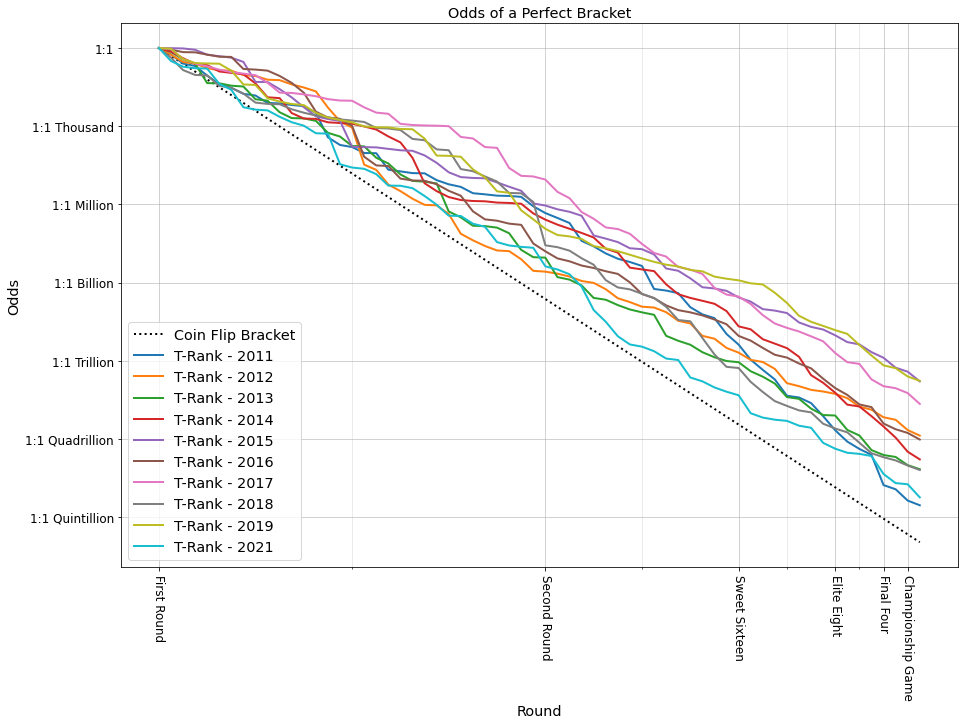

In [4]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)


fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

line, = ax.plot(coinFlipOdds, color='black', lw=2,linestyle='dotted',label='Coin Flip Bracket')

for ind,year in enumerate(Year):
    ax.plot(totalOdds[ind,:],  lw=2,label=f'T-Rank - {year}')

ax.set_yscale('log', base=10)
plt.legend(loc='lower left')
plt.xlabel('Round')
plt.ylabel('Odds')
plt.title('Odds of a Perfect Bracket')


ax.set_yticks([10**0,10**-3,10**-6,10**-9,10**-12,10**-15,10**-18])
ax.set_yticklabels(['1:1','1:1 Thousand','1:1 Million','1:1 Billion','1:1 Trillion','1:1 Quadrillion','1:1 Quintillion'])


ax.set_xticklabels(ax.get_xticks(), rotation = -90)
ax.set_xticks([0,32,48,56,60,62])
ax.set_xticks([16,40,52,58], minor = True)
ax.set_xticklabels(['First Round','Second Round','Sweet Sixteen','Elite Eight','Final Four','Championship Game'])

ax.grid(which = 'minor', alpha = 0.3)
ax.grid(which = 'major', alpha = 0.7)


plt.show()